### Importação dos dados



In [90]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [30]:
lojas = [loja1, loja2, loja3, loja4]

faturamento = [float(loja["Preço"].sum()) for loja in lojas]

nome_lojas =["loja 1", "loja 2", "loja 3", "loja 4"]

faturamento_total = list(zip(nome_lojas, faturamento))
faturamento_total

[('loja 1', 1534509.12),
 ('loja 2', 1488459.06),
 ('loja 3', 1464025.03),
 ('loja 4', 1384497.58)]

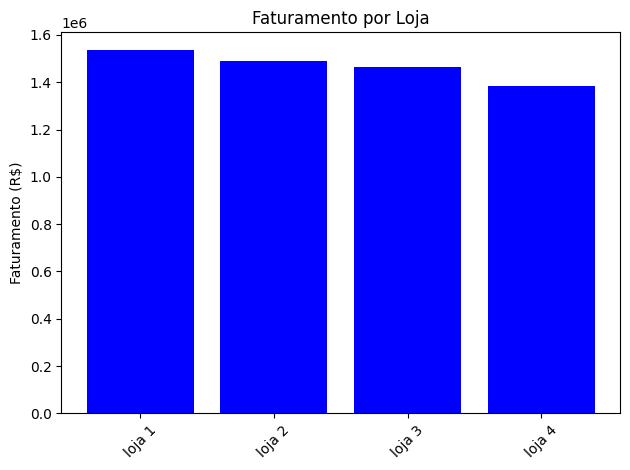

In [91]:
plt.bar(nome_lojas, faturamento, color = "blue")
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Loja")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [65]:
categorias_populares = [(serie.index[0], int(serie.values[0])) for serie in (loja.groupby("Categoria do Produto").size().sort_values(ascending=False).head(1) for loja in lojas)]

categorias_populares_loja = list(zip(nome_lojas, categorias_populares))

categorias_populares_loja

[('loja 1', ('moveis', 465)),
 ('loja 2', ('moveis', 442)),
 ('loja 3', ('moveis', 499)),
 ('loja 4', ('moveis', 480))]

# 3. Média de Avaliação das Lojas

In [49]:
media_avaliacoes = [float(round(loja["Avaliação da compra"].sum() / loja["Avaliação da compra"].count(), 3)) for loja in lojas]

media_avaliacoes_lojas = list(zip(nome_lojas, media_avaliacoes))

media_avaliacoes_lojas

[('loja 1', 3.977), ('loja 2', 4.037), ('loja 3', 4.048), ('loja 4', 3.996)]

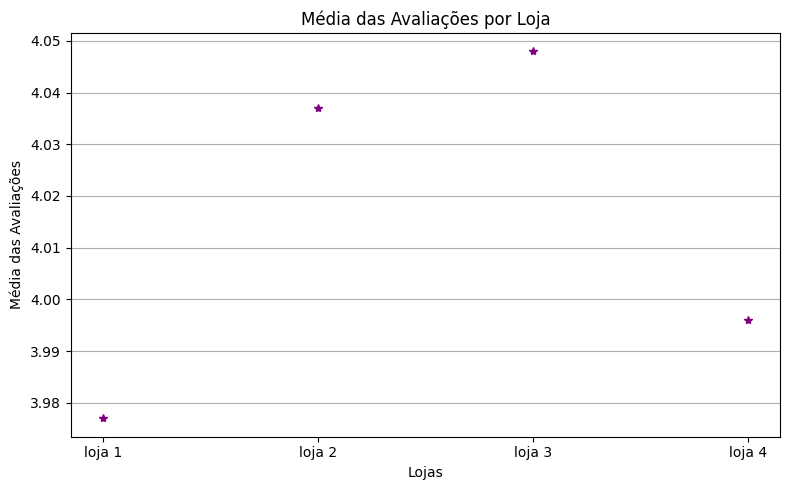

In [89]:
plt.figure(figsize=(8, 5))
plt.plot(nome_lojas, media_avaliacoes, '*', color = "purple")
plt.ylabel("Média das Avaliações")
plt.xlabel("Lojas")
plt.title("Média das Avaliações por Loja")
plt.grid(axis = "y")
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [63]:
produtos_destaque = [(vendas.idxmax(), vendas.max(), vendas.idxmin(), vendas.min()) for vendas in (loja.groupby("Produto").size() for loja in lojas)]

produtos_destaque_por_loja = list(zip(nome_lojas, produtos_destaque))

produtos_destaque_por_loja

[('loja 1', ('Guarda roupas', 60, 'Celular ABXY', 33)),
 ('loja 2', ('Iniciando em programação', 65, 'Jogo de tabuleiro', 32)),
 ('loja 3', ('Kit banquetas', 57, 'Blocos de montar', 35)),
 ('loja 4', ('Cama box', 62, 'Guitarra', 33))]

# 5. Frete Médio por Loja


In [51]:
media_frete = [float(round(loja["Frete"].sum() / loja["Frete"].count(), 3)) for loja in lojas]

media_frete_lojas = list(zip(nome_lojas, media_frete))

media_frete_lojas

[('loja 1', 34.692),
 ('loja 2', 33.622),
 ('loja 3', 33.074),
 ('loja 4', 31.279)]

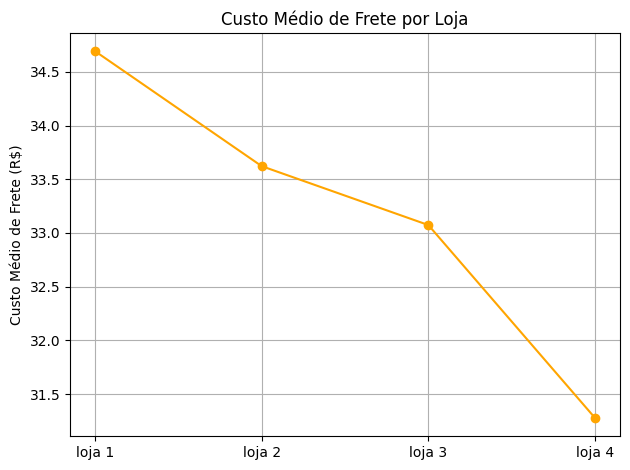

In [92]:
plt.plot(nome_lojas, media_frete, marker = "o", linestyle = "-", color = "orange")
plt.ylabel("Custo Médio de Frete (R$)")
plt.title("Custo Médio de Frete por Loja")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Relatório Final


Analisando os dados disponíveis, é possível considerar alguns pontos para que o Sr. João possa tomar a escolha certa. A Loja 1 tem o maior faturamento, mas em contrapartida também tem a pior avaliação dentre as quatro lojas, e o maior custo médio de frete. Já a loja 4 vem em segundo lugar com a pior avaliação e tem o pior faturamento quando comparada com as outras lojas, e talvez esse seja o motivo de ter o menor custo médio de frete, que parece ser algo bom à primeira vista, mas uma média alta indica altas vendas. As lojas 2 e 3 tiveram resultados bem parecidos, bom faturamento e avaliações mais altas, o que indica que elas são ótimas lojas para a Alura Store. Todas elas têm “Móveis” como categorias mais vendidas, dentre todas a loja 4 foi a que mais vendeu “Móveis”, indicando dependência nessa categoria, já que as vendas são menores. Diferente das outras lojas que mesmo tendo móveis como categoria mais popular, com as altas vendas mostra uma diversidade maior.

Com essas análises, o Sr. João deve optar por **fechar a loja 4**, ela tem uma avaliação negativa alta e por ter o menor faturamento é a loja que vai afetar menos a receita do e-commerce, diferente da loja 1 que é a maior fonte de renda, por isso a melhor decisão para essa loja é entender o porquê das reclamações altas e focar em aumentar a boa experiência dos clientes.
